<a href="https://colab.research.google.com/github/Yujin726/0624/blob/main/07_04_colab_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🎯 Mission: 기본 플롯 만들기

##✅ 조건 목록:

1. Import

 - import matplotlib.pyplot as plt

2. 함수 정의

 - 함수 이름: setup_basic_plot(step_num=1, action="forward")

3. 캔버스 크기

 - figsize=(8, 6)

4. 축 범위

 - X축: -1부터 8까지

 - Y축: -1부터 12까지

5. 글자 크기

 - 라벨과 제목에 fontsize=12 적용

6. 제목

 - f-string을 사용해 동적으로 설정

 - 예시: "Step 5: Action = turn_left"

7. 레이아웃 최적화

 - plt.tight_layout() 사용

 - plt.show() 바로 직전에 위치

8. 그래프 표시

 - plt.show() 사용

9. 반환값

 - 함수는 ax 객체를 반환해야 함

10. 실행 코드

 - if __name__ == "__main__":

      setup_basic_plot(5, "turn_left")


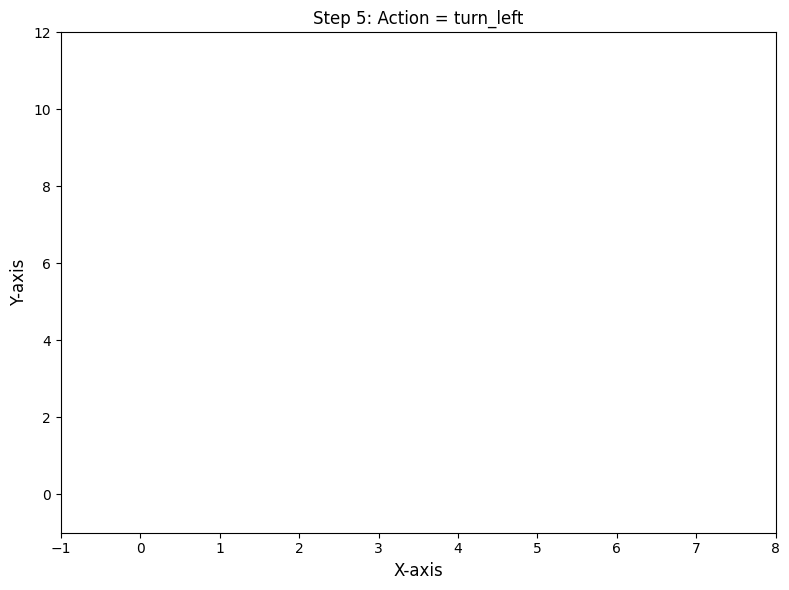

In [1]:
import matplotlib.pyplot as plt

def setup_basic_plot(step_num=1, action="forward"):
    # 캔버스 크기 설정
    fig, ax = plt.subplots(figsize=(8, 6))

    # 축 범위 설정
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)

    # 축 라벨 및 제목
    ax.set_xlabel("X-axis", fontsize=12)
    ax.set_ylabel("Y-axis", fontsize=12)
    ax.set_title(f"Step {step_num}: Action = {action}", fontsize=12)

    # 레이아웃 정리
    plt.tight_layout()

    # 그래프 표시
    plt.show()

    # ax 객체 반환
    return ax

# 실행 부분
if __name__ == "__main__":
    setup_basic_plot(5, "turn_left")


# 🎯 Mission: 목표선 그리기 함수 만들기

## ✅ 조건 목록:

1. Import  
 - import matplotlib.pyplot as plt

2. 함수 정의  
 - 함수 이름: draw_goal_line(obstacles)  
 - 매개변수: obstacles (장애물 좌표의 집합 또는 리스트)

3. 캔버스 크기  
 - figsize=(8, 6)

4. 축 범위  
 - X축: -1부터 8까지  
 - Y축: -1부터 12까지

5. 격자 설정  
 - ax.grid(True, alpha=0.3) 사용

6. 목표선 계산  
 - 가장 높은 장애물의 Y좌표를 기준으로 목표선 계산  
 - goal_y = 최대 Y좌표 + 3  
 - 장애물이 없으면 goal_y = 0

7. 목표선 그리기  
 - ax.axhline() 함수 사용  
 - 선 색상: color='lime'  
 - 선 두께: linewidth=3  
 - 투명도: alpha=0.7  
 - 범례용 라벨 포함

8. 텍스트 표시  
 - 위치: (7, goal_y + 0.2)  
 - 내용: f"GOAL (y={goal_y})"  
 - 색상: 'green'  
 - 정렬: ha='left', va='bottom'

9. 기타 설정  
 - ax.legend() 사용  
 - plt.tight_layout()  
 - plt.show()

10. 반환값  
 - goal_y 값 반환

11. 실행 코드 예시  
 - if __name__ == "__main__":  
    obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}  
    draw_goal_line(obstacles)

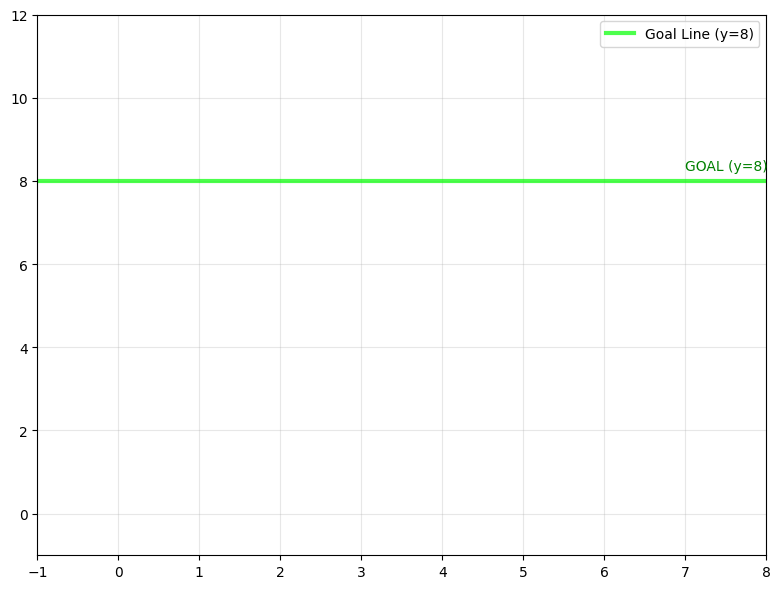

In [2]:
import matplotlib.pyplot as plt

def draw_goal_line(obstacles):
    # 캔버스 및 축 생성
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)
    ax.grid(True, alpha=0.3)

    # goal_y 계산
    if obstacles:
        max_y = max(y for (_, y) in obstacles)
        goal_y = max_y + 3
    else:
        goal_y = 0

    # 목표선 그리기
    ax.axhline(goal_y, color='lime', linewidth=3, alpha=0.7, label=f"Goal Line (y={goal_y})")

    # 텍스트 표시
    ax.text(7, goal_y + 0.2, f"GOAL (y={goal_y})", color='green', ha='left', va='bottom')

    # 범례 및 레이아웃
    ax.legend()
    plt.tight_layout()
    plt.show()

    return goal_y

# 실행 예시
if __name__ == "__main__":
    obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}
    draw_goal_line(obstacles)


# 📝 Mission: 장애물 그리기 함수 만들기

## ✅ 조건 목록:

1. Import  
 - import matplotlib.pyplot as plt  
 - from matplotlib.patches import Rectangle

2. 함수 정의  
 - 함수 이름: draw_obstacles(obstacles)  
 - 매개변수: obstacles (장애물 위치들의 set 또는 list)

3. 캔버스 설정  
 - figsize=(8, 6)

4. 축 범위 설정  
 - ax.set_xlim(-1, 8)  
 - ax.set_ylim(-1, 12)

5. 정사각형 비율 유지  
 - ax.set_aspect('equal')

6. 격자 및 라벨 설정  
 - x축, y축 라벨 설정  
 - ax.grid(True, alpha=0.3)

7. 데이터 처리  
 - set을 list로 변환하여 순서 보장  
 - isinstance() 함수로 타입 확인

8. 장애물 그리기  
 - 빨간색 사각형 (color='red', alpha=0.7)  
 - 크기: 0.8 x 0.8  
 - 중심 좌표에서 0.4씩 빼서 위치 조정  
 - Rectangle 패치 사용  
 - ax.add_patch(rect)로 추가

9. 텍스트 표시  
 - 각 장애물 중앙에 번호 표시  
 - 글자 색상: 흰색  
 - 굵은 글씨 (weight='bold')  
 - enumerate() 함수로 번호 매기기

10. 범례 및 출력  
 - 첫 번째 장애물에만 label 추가  
 - ax.legend()로 범례 표시  
 - 콘솔에 장애물 정보 출력

11. 레이아웃 및 실행  
 - plt.tight_layout()  
 - plt.show()

12. 실행 코드 예시  
 - if __name__ == "__main__":  
    obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}  
    draw_obstacles(obstacles)


장애물 1: 위치 (4, 5)
장애물 2: 위치 (3, 3)
장애물 3: 위치 (3, 2)
장애물 4: 위치 (2, 4)


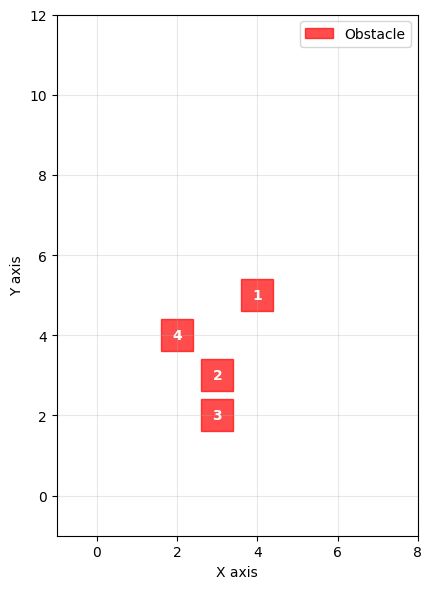

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def draw_obstacles(obstacles):
    # 타입 확인 후 set이면 list로 변환
    if isinstance(obstacles, set):
        obstacles = list(obstacles)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(-1, 8)
    ax.set_ylim(-1, 12)
    ax.set_aspect('equal')

    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.grid(True, alpha=0.3)

    for i, (x, y) in enumerate(obstacles):
        # 사각형 위치는 중심에서 0.4씩 빼서 왼쪽 아래 좌표 맞춤
        rect = Rectangle((x - 0.4, y - 0.4), 0.8, 0.8, color='red', alpha=0.7)
        # 첫 번째 장애물에만 레이블 추가
        if i == 0:
            ax.add_patch(rect)
            rect.set_label("Obstacle")
        else:
            ax.add_patch(rect)
        # 번호 텍스트 중앙에 표시
        ax.text(x, y, str(i + 1), color='white', weight='bold',
                ha='center', va='center')

        # 콘솔 출력
        print(f"장애물 {i + 1}: 위치 ({x}, {y})")

    ax.legend()
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    obstacles = {(3, 2), (3, 3), (2, 4), (4, 5)}
    draw_obstacles(obstacles)


# 📝 Mission: 이동 경로 그리기 함수 만들기

## ✅ 조건 목록:

1. Import 설정  
 - import matplotlib.pyplot as plt

2. 함수 정의  
 - 함수 이름: draw_path(path)  
 - 매개변수: path (이동 경로 좌표들의 리스트)

3. 캔버스 설정  
 - 크기: figsize=(8, 6)  
 - 축 범위 설정: x축 -18까지, y축 -112까지 포함  
   (입력 데이터 기반 자동 처리 or 확장 범위 적용)  
 - 정사각형 비율 유지: ax.set_aspect('equal')  
 - 격자 설정: ax.grid(True, alpha=0.3)  
 - 제목 설정: "Movement Path"

4. 경로선 그리기 (점이 2개 이상일 때만)  
 - 선 스타일: 초록색 점선 ('g--')  
 - 선 두께: linewidth=3  
 - 투명도: alpha=0.8  
 - 리스트 컴프리헨션으로 x, y 분리 후  
   ax.plot(path_x, path_y, ...) 사용

5. 시작점 & 끝점 표시  
 - 시작점: 파란색 원 ('bo', markersize=10), 라벨에 좌표 포함  
 - 끝점: 빨간색 원 ('ro', markersize=10), 라벨에 좌표 포함

6. 점 번호 표시  
 - 번호: (1번, 2번, ...)  
 - 위치: (x + 0.2, y + 0.2)  
 - 노란색 둥근 박스 배경  
 - enumerate() 함수 사용


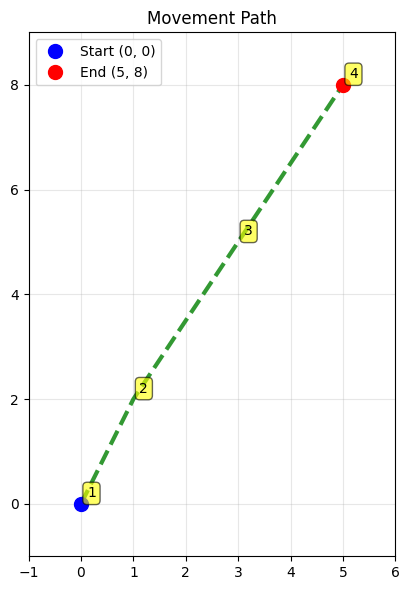

In [4]:
import matplotlib.pyplot as plt

def draw_path(path):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_aspect('equal')
    ax.grid(True, alpha=0.3)
    ax.set_title("Movement Path")

    # x, y 좌표 분리
    path_x = [x for x, y in path]
    path_y = [y for x, y in path]

    # 축 범위 설정 (최소값보다 조금 더 작게)
    ax.set_xlim(min(path_x) - 1, max(path_x) + 1)
    ax.set_ylim(min(path_y) - 1, max(path_y) + 1)

    # 경로선 (2개 이상 점이 있을 때만)
    if len(path) >= 2:
        ax.plot(path_x, path_y, 'g--', linewidth=3, alpha=0.8)

    # 시작점 표시 (파란색)
    start_x, start_y = path[0]
    ax.plot(start_x, start_y, 'bo', markersize=10, label=f"Start ({start_x}, {start_y})")

    # 끝점 표시 (빨간색)
    end_x, end_y = path[-1]
    ax.plot(end_x, end_y, 'ro', markersize=10, label=f"End ({end_x}, {end_y})")

    # 점 번호 표시
    for i, (x, y) in enumerate(path):
        ax.text(x + 0.2, y + 0.2, str(i + 1),
                bbox=dict(facecolor='yellow', alpha=0.6, boxstyle='round'),
                ha='center', va='center')

    ax.legend()
    plt.tight_layout()
    plt.show()

# 실행 예시
if __name__ == "__main__":
    path = [(0, 0), (1, 2), (3, 5), (5, 8)]
    draw_path(path)


# 📝 Mission: 센서 빔 그리기 함수 만들기

## ✅ 조건 목록:
1. 함수 정의  
 - 함수 이름: draw_sensors(x, y, sensors)  
 - 매개변수:
   - x, y: 차량 위치 좌표
   - sensors: 딕셔너리 형태의 센서 거리 {'front': 값, 'left': 값, 'right': 값}

2. 캔버스 설정  
 - 크기: figsize=(6, 5)  
 - 격자: ax.grid(True, alpha=0.3)  
 - 제목: "Sensors"

3. 차량 위치 표시  
 - 검은색 원점: 'ko'  
 - 크기: markersize=15

4. 센서 빔 그리기  
 - 전방: 'b-' (파란 직선)  
   시작 → 끝: (x, y) → (x, y + sensors['front'])  
 - 좌측: 'g-' (초록 직선)  
   시작 → 끝: (x, y) → (x - sensors['left'], y)  
 - 우측: 'r-' (빨간 직선)  
   시작 → 끝: (x, y) → (x + sensors['right'], y)  
 - 공통 스타일: linewidth=3



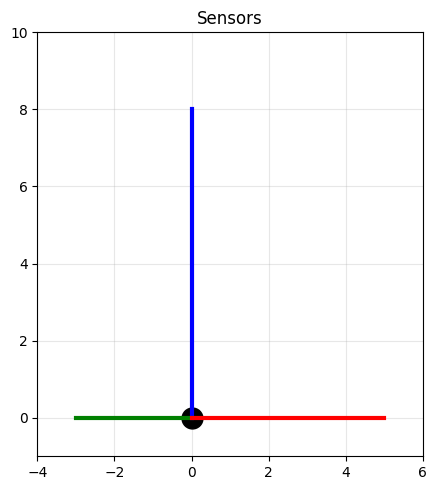

In [5]:
import matplotlib.pyplot as plt

def draw_sensors(x, y, sensors):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_title("Sensors")
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')

    # 차량 위치 표시
    ax.plot(x, y, 'ko', markersize=15)

    # 센서 빔 그리기
    # 전방 (파란색)
    ax.plot([x, x], [y, y + sensors['front']], 'b-', linewidth=3)

    # 좌측 (초록색)
    ax.plot([x, x - sensors['left']], [y, y], 'g-', linewidth=3)

    # 우측 (빨간색)
    ax.plot([x, x + sensors['right']], [y, y], 'r-', linewidth=3)

    # 축 범위 자동 설정 + 여유 공간 확보
    ax.set_xlim(x - max(sensors['left'], 1) - 1, x + max(sensors['right'], 1) + 1)
    ax.set_ylim(y - 1, y + sensors['front'] + 2)

    plt.tight_layout()
    plt.show()

# 실행 예시
if __name__ == "__main__":
    sensors = {
        'front': 8.0,
        'left': 3.0,
        'right': 5.0
    }
    draw_sensors(0, 0, sensors)


# 📝 Mission: 센서 빔 그리기 함수 만들기 + 거리
## ✅ 조건 목록:
1. 함수 정의  
 - 함수 이름: draw_sensors(x, y, sensors)  
 - 매개변수:
   - x, y: 차량 위치 좌표
   - sensors: 딕셔너리 {'front': 값, 'left': 값, 'right': 값}

2. 캔버스 설정  
 - 크기: figsize=(6, 5)  
 - 격자: ax.grid(True, alpha=0.3)  
 - 제목: "Sensors"  
 - 정사각형 비율: ax.set_aspect('equal')

3. 차량 위치 표시  
 - 검은색 원점: 'ko', markersize=15

4. 센서 빔 그리기  
 - 최대 길이 제한: sensor_length = 3  
 - 전방: 'b-' 선, (x, y) → (x, y + front_reach)  
 - 좌측: 'g-' 선, (x, y) → (x - left_reach, y)  
 - 우측: 'r-' 선, (x, y) → (x + right_reach, y)  
 - linewidth=3 (공통)

5. 센서 거리 텍스트 표시  
 - 전방: 파란색 텍스트, 위치: (x + 0.1, y + front_reach / 2)  
 - 형식: 소수점 한 자리 표시 (`f'{값:.1f}'`)  
 - fontweight='bold'

6. 센서 끝점 표시  
 - 전방 끝점: 'bo', markersize=8  
 - 좌측 끝점: 'go', markersize=8  
 - 우측 끝점: 'ro', markersize=8


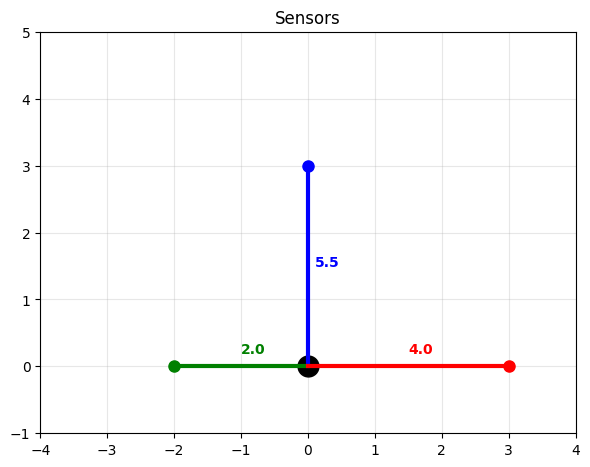

In [6]:
import matplotlib.pyplot as plt

def draw_sensors(x, y, sensors):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_title("Sensors")
    ax.grid(True, alpha=0.3)
    ax.set_aspect('equal')

    # 최대 센서 길이 제한
    sensor_length = 3
    front_reach = min(sensors['front'], sensor_length)
    left_reach = min(sensors['left'], sensor_length)
    right_reach = min(sensors['right'], sensor_length)

    # 차량 위치 표시
    ax.plot(x, y, 'ko', markersize=15)

    # 전방 센서 빔
    ax.plot([x, x], [y, y + front_reach], 'b-', linewidth=3)
    ax.plot(x, y + front_reach, 'bo', markersize=8)
    ax.text(x + 0.1, y + front_reach / 2, f'{sensors["front"]:.1f}', color='blue', fontweight='bold')

    # 좌측 센서 빔
    ax.plot([x, x - left_reach], [y, y], 'g-', linewidth=3)
    ax.plot(x - left_reach, y, 'go', markersize=8)
    ax.text(x - left_reach / 2, y + 0.2, f'{sensors["left"]:.1f}', color='green', fontweight='bold')

    # 우측 센서 빔
    ax.plot([x, x + right_reach], [y, y], 'r-', linewidth=3)
    ax.plot(x + right_reach, y, 'ro', markersize=8)
    ax.text(x + right_reach / 2, y + 0.2, f'{sensors["right"]:.1f}', color='red', fontweight='bold')

    # 축 범위 자동 설정
    max_x_range = max(right_reach, left_reach) + 1
    ax.set_xlim(x - max_x_range, x + max_x_range)
    ax.set_ylim(y - 1, y + front_reach + 2)

    plt.tight_layout()
    plt.show()

# 실행 예시
if __name__ == "__main__":
    sensors = {
        'front': 5.5,
        'left': 2.0,
        'right': 4.0
    }
    draw_sensors(0, 0, sensors)
